In [5]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os.path

pd.set_option('display.max_rows', 1000)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [7]:
# Load Data
data = {}
labels = {}

DATASETS = ['Birds']
METHODS = ['CRS', 'DAL-HERS', 'DISF', 'DRW', 'ERGC', 'ERS', 'ETPS', 'GMMSP', 'IBIS', 'ISF', 'LNSNet', 'LSC', 'ODISF', 'RSS', 'SCALP', 'SEEDS', 'SH', 'SLIC','SNIC']
#METHODS = ['CRS', 'DISF', 'DRW', 'ERGC', 'ERS', 'ETPS', 'GMMSP', 'IBIS', 'ISF', 'LSC', 'ODISF', 'RSS', 'SCALP', 'SEEDS', 'SH', 'SLIC','SNIC']
METRICS = ['BR', 'UE', 'CO', 'SIRS', 'EV']
#METRICS = ['BR', 'UE']
SPN = [400]
METRICS_2 = METRICS + ['Superpixels']

for dataset in DATASETS:
    for method in METHODS:
        for metric in METRICS:
            
            scores = []
            noise_values = []
            superpixels = []

            noise_name = 'avgblur'
            noise = 0
            for SPX in SPN:
                path = '../../RESULTS/Eval/'
                if(method == 'CRS' or method == 'SEEDS'):
                    path = path + '/connect_merge/unconnected/' + method
                    if(method == 'CRS'):
                        path = path + '/0.045-0.3-3-0/' + dataset + '/' + metric
                    else:
                        path = path + '/5-0.1-1-1-2-1/' + dataset + '/' + metric
                elif(method == 'ETPS'):
                    path = path + '/' + method + '/1-1-1-1/' + dataset + '/' + metric
                else:
                    path = path + '/' + method + '/' + dataset + '/' + metric

                file = path + '/' + method + '-' + str(SPX) + '.txt'
                if(os.path.exists(file) is False):
                    file = path + '/' + method + '-16-4/' + method + '-' + str(SPX) + '.txt'
                    if(os.path.exists(file) is False):
                        file = path + '/' + method + '-16-4/' + method + '-16-4-' + str(SPX) + '.txt'
                        if(os.path.exists(file) is False):
                            file = path + '/' + method + '-8-2/' + method + '-' + str(SPX) + '.txt'
                            if(os.path.exists(file) is False):
                                file = path + '/' + method + '-8-2/' + method + '-8-2-' + str(SPX) + '.txt'
                                if(os.path.exists(file) is False):
                                    file = path + '/' + method + '-8-2-' + str(SPX) + '.txt'

                tmp = pd.read_csv(file, sep=" ", names=["Image", "Superpixels", metric])
                scores.append(tmp[metric].mean())
                superpixels.append(tmp['Superpixels'].mean())
                noise_values.append(noise)
                if(len(tmp[metric]) != 150):
                    print(noise_name+'/'+str(noise)+'/'+method+'/'+dataset+'/'+metric, " ",len(tmp[metric]))

            for noise in [5,9,13,17]:
                for SPX in SPN:
                    file = '../../RESULTS/Eval/'+noise_name+'/'+str(noise)+'/'+method+'/'+dataset+'/'+metric+'/'+method+'-'+str(SPX)+'.txt'
                    tmp = pd.read_csv(file, sep=" ", names=["Image", "Superpixels", metric])
                    scores.append(tmp[metric].mean())
                    superpixels.append(tmp['Superpixels'].mean())
                    noise_values.append(noise)
                    if(len(tmp[metric]) != 150):
                        print(noise_name+'/'+str(noise)+'/'+method+'/'+dataset+'/'+metric, " ",len(tmp[metric]))

            key=metric+'-'+noise_name+'-'+dataset+'-'+method
            data[key] = pd.DataFrame({'Noise':noise_values, metric: scores})

            if(metric == METRICS[0]):
                key='Superpixels-'+noise_name+'-'+dataset+'-'+method
                data[key] = pd.DataFrame({'Noise':noise_values, 'Superpixels': superpixels})
        

            if method == 'grid':
                labels[key] = 'GRID'
            else:
                labels[key] = method

            scores = []
            noise_values = []
            superpixels = []
            
            noise_name = 'salt_pepper'
            noise = 0.0
            for SPX in SPN:
                path = '../../RESULTS/Eval/'
                if(method == 'CRS' or method == 'SEEDS'):
                    path = path + '/connect_merge/unconnected/' + method
                    if(method == 'CRS'):
                        path = path + '/0.045-0.3-3-0/' + dataset + '/' + metric
                    else:
                        path = path + '/5-0.1-1-1-2-1/' + dataset + '/' + metric
                elif(method == 'ETPS'):
                    path = path + '/' + method + '/1-1-1-1/' + dataset + '/' + metric
                else:
                    path = path + '/' + method + '/' + dataset + '/' + metric

                file = path + '/' + method + '-' + str(SPX) + '.txt'
                if(os.path.exists(file) is False):
                    file = path + '/' + method + '-16-4/' + method + '-' + str(SPX) + '.txt'
                    if(os.path.exists(file) is False):
                        file = path + '/' + method + '-16-4/' + method + '-16-4-' + str(SPX) + '.txt'
                        if(os.path.exists(file) is False):
                            file = path + '/' + method + '-8-2/' + method + '-' + str(SPX) + '.txt'
                            if(os.path.exists(file) is False):
                                file = path + '/' + method + '-8-2/' + method + '-8-2-' + str(SPX) + '.txt'
                                if(os.path.exists(file) is False):
                                    file = path + '/' + method + '-8-2-' + str(SPX) + '.txt'

                tmp = pd.read_csv(file, sep=" ", names=["Image", "Superpixels", metric])
                scores.append(tmp[metric].mean())
                superpixels.append(tmp['Superpixels'].mean())
                noise_values.append(noise)
                if(len(tmp[metric]) != 150):
                    print(noise_name+'/'+str(noise)+'/'+method+'/'+dataset+'/'+metric, " ",len(tmp[metric]))

            for noise in [0.04,0.08,0.12,0.16]:
                for SPX in SPN:
                    file = '../../RESULTS/Eval/'+noise_name+'/'+str(noise)+'/'+method+'/'+dataset+'/'+metric+'/'+method+'-'+str(SPX)+'.txt'
                    tmp = pd.read_csv(file, sep=" ", names=["Image", "Superpixels", metric])
                    scores.append(tmp[metric].mean())
                    superpixels.append(tmp['Superpixels'].mean())
                    noise_values.append(noise)
                    if(len(tmp[metric]) != 150):
                        print(noise_name+'/'+str(noise)+'/'+method+'/'+dataset+'/'+metric, " ",len(tmp[metric]))
                    

            key=metric+'-'+noise_name+'-'+dataset+'-'+method
            data[key] = pd.DataFrame({'Noise':noise_values, metric: scores})

            if(metric == METRICS[0]):
                key='Superpixels-'+noise_name+'-'+dataset+'-'+method
                data[key] = pd.DataFrame({'Noise':noise_values, 'Superpixels': superpixels})

            if method == 'grid':
                labels[key] = 'GRID'
            else:
                labels[key] = method
            


In [350]:
# Write data
for dataset in DATASETS:
    for method in METHODS:
        for noise_name in ['avgblur','salt_pepper']:
            for metric in METRICS_2:
                file = '/home/isabela/Documentos/codes/RESULTS/metrics/robustness/'+noise_name+'/'+metric
                if not os.path.exists(file):
                    os.makedirs(file)
                file = file+'/'+method+'-'+dataset+'-'+metric+'.txt'

                key=metric+'-'+noise_name+'-'+dataset+'-'+method
                data[key].to_csv(file, header=['K', 'VALOR'], index=None, sep=' ', mode='w')

In [10]:
# Create tables for visualization

df_metrics = {}
dataset = DATASETS[0]

columns = {}
columns['avgblur'] = ['5','9','13','17']
columns['salt_pepper'] = ['0.04','0.08','0.12','0.16']

for metric in METRICS_2:
  for noise_name in ['avgblur','salt_pepper']:

    df = [data[metric+'-'+noise_name+'-'+dataset+'-'+method].diff().drop(index=0)[metric].tolist() for method in METHODS]
    df_metrics[metric+'-'+noise_name] = pd.DataFrame(np.array(df), columns=columns[noise_name], index=METHODS)

df_metrics[metric+'-'+noise_name]

,0.04,0.08,0.12,0.16
CRS,0.000000,0.000000,0.000000,0.000000
DAL-HERS,443.680000,188.053333,138.020000,166.333333
DISF,0.000000,0.000000,0.000000,0.000000
DRW,60.986667,5.346667,1.900000,-1.513333
ERGC,0.000000,0.000000,0.000000,0.000000
ERS,0.000000,0.000000,0.000000,0.000000
ETPS,0.000000,0.000000,0.000000,0.000000
GMMSP,-43.746667,-13.853333,-2.100000,2.713333
IBIS,-47.940000,-46.320000,-36.306667,-30.886667
ISF,-1.246667,1.620000,-0.493333,1.953333


In [11]:
# customizing one table 

noise_name = 'avgblur'
metric = METRICS[0]
df = df_metrics[metric+'-'+noise_name]
styler = df.style
for c in columns[noise_name]:
  styler.background_gradient(cmap='Reds_r', subset=(df[c] < 0, c), vmax=0)
  styler.background_gradient(cmap='Greens', subset=(df[c] > 0, c), vmin=0)
display(styler)

,5,9,13,17
CRS,-0.024088,-0.110840,-0.077793,-0.027315
DAL-HERS,0.041854,-0.025794,-0.038631,-0.043627
DISF,-0.002736,-0.020258,-0.043458,-0.047211
DRW,-0.041608,-0.178255,-0.207925,-0.099002
ERGC,0.000692,-0.029838,-0.070714,-0.076702
ERS,-0.033849,-0.073611,-0.091884,-0.055058
ETPS,-0.053464,-0.080935,-0.097796,-0.088617
GMMSP,-0.016877,-0.068373,-0.116390,-0.084210
IBIS,0.008392,-0.047277,-0.086443,-0.096901
ISF,-0.000640,-0.019493,-0.056323,-0.063164


In [169]:
# customizing all tables to analysis

# https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

import seaborn as sns
from IPython.display import display, HTML, display_html
from itertools import chain,cycle

METRICS = ['BR', 'UE', 'EV', 'SIRS','Superpixels']
VALRANGE = {}
VALRANGE['BR'] = [-0.752378, 0.041854]
VALRANGE['UE'] = [-0.002464, 0.086625]
VALRANGE['EV'] = [-0.781250, 0.025808]
VALRANGE['SIRS'] = [-0.598478, 0.061666]
VALRANGE['Superpixels'] = [-605.400000, 11972.646667]

VALRANGE['BR'] = [-0.4, 0.02]
VALRANGE['UE'] = [-0.001, 0.009]
VALRANGE['EV'] = [-0.2, 0.02]
VALRANGE['SIRS'] = [-0.2, 0.06]
VALRANGE['Superpixels'] = [-100, 100]

complete_df = {}
# adding multiple headers
for noise_name in ['avgblur','salt_pepper']:
  all_dfs = []
  for metric in METRICS:
    new_df = df_metrics[metric+'-'+noise_name].copy()
    columns = new_df.columns.tolist()
    new_df.columns = [[metric for x in range(len(columns))], [c for c in columns]]
    all_dfs.append(new_df)
  complete_df[noise_name] = pd.concat(all_dfs, axis=1)
  #display(complete_df[noise_name].style.format(precision=6))

columns = {'avgblur':['5','9','13','17'], 'salt_pepper':['0.04','0.08','0.12','0.16']}

for noise_name in ['avgblur','salt_pepper']:
  
  styler = complete_df[noise_name].style
  styler.set_properties(**{'max-width': '35px', 'min-width': '35px', 'font-size': '7pt'}).format(precision=3)
  
  for metric in METRICS:
    df = complete_df[noise_name][metric]
    for c in columns[noise_name]:
      if df[df[c] < 0].count().sum() > 0:
        styler.background_gradient(cmap='Reds_r', subset=(complete_df[noise_name][metric][c] < 0, (metric,c)), vmax=0, vmin=VALRANGE[metric][0])
      if df[df[c] > 0].count().sum() > 0:
        styler.background_gradient(cmap='Greens', subset=(complete_df[noise_name][metric][c] > 0, (metric,c)), vmin=0, vmax=VALRANGE[metric][1])

  display(styler)



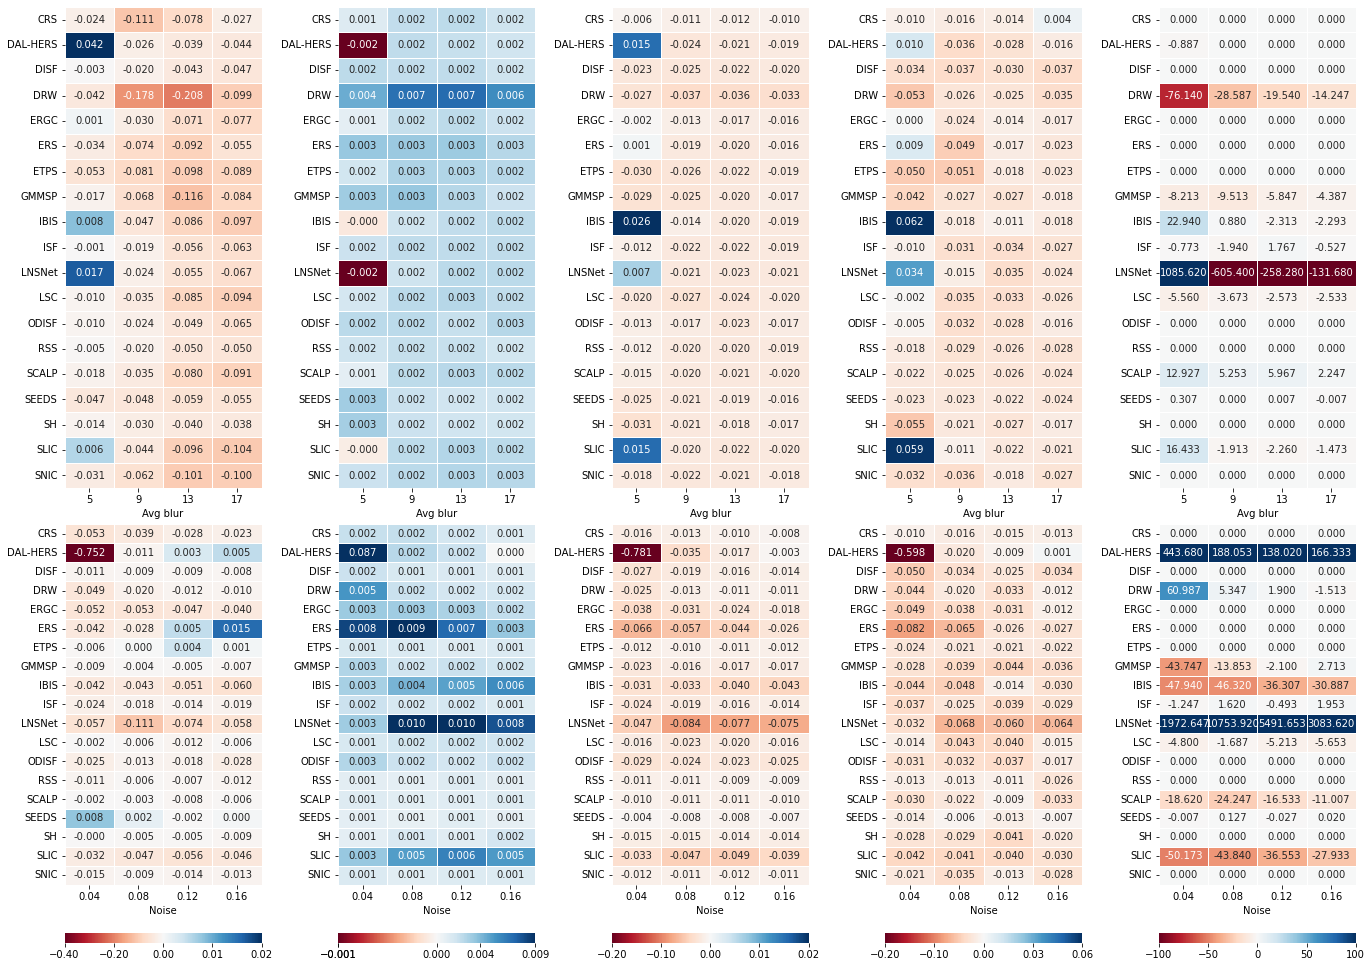

In [180]:

# https://stackoverflow.com/questions/56536419/how-to-set-center-color-in-heatmap
from matplotlib.colors import TwoSlopeNorm

VALRANGE['BR'] = [-0.4, 0.02]
VALRANGE['UE'] = [-0.001, 0.009]
VALRANGE['EV'] = [-0.2, 0.02]
VALRANGE['SIRS'] = [-0.2, 0.06]
VALRANGE['Superpixels'] = [-100, 100]

def getTicks(df, metric):
  return [round(VALRANGE[metric][0],3), round(VALRANGE[metric][0]/2,3), 0, round(VALRANGE[metric][1]/2,3), round(VALRANGE[metric][1],3)]

def get_cbar_kws(df, metric):
  return {"ticks":getTicks(df, metric), 'orientation': 'horizontal', 'shrink': 1, 'pad':0.1}

fig, ax = plt.subplots(2, 5, figsize=(19, 14)) # width, height

i = 0
for metric in ['BR', 'UE', 'EV', 'SIRS', 'Superpixels']:
  df = complete_df['avgblur'][metric].copy()

  if VALRANGE[metric][1] <= 0:
    sns.heatmap(df, annot=True, fmt=".3f", linewidths=0.5, cmap='Reds_r', cbar=False, cbar_kws=get_cbar_kws(complete_df,metric), ax=ax[0,i])
  elif VALRANGE[metric][0] >= 0:
    sns.heatmap(df, annot=True, fmt=".3f", linewidths=0.5, cmap='Blues', cbar=False, cbar_kws=get_cbar_kws(complete_df,metric), ax=ax[0,i])
  else:
    divnorm = TwoSlopeNorm(vmin=VALRANGE[metric][0], vcenter=0.0, vmax=VALRANGE[metric][1])
    sns.heatmap(df, norm=divnorm, annot=True, fmt=".3f", linewidths=0.5, cmap='RdBu', cbar=False, cbar_kws=get_cbar_kws(complete_df,metric), ax=ax[0,i])
  ax[0,i].set_xlabel('Avg blur')
  i += 1

i = 0
for metric in ['BR', 'UE', 'EV', 'SIRS', 'Superpixels']:
  df = complete_df['salt_pepper'][metric].copy()

  if VALRANGE[metric][1] <= 0:
    sns.heatmap(df, annot=True, fmt=".3f", linewidths=0.5, cmap='Reds_r', cbar=True, cbar_kws=get_cbar_kws(complete_df,metric), ax=ax[1,i])
  elif VALRANGE[metric][0] >= 0:
    sns.heatmap(df, annot=True, fmt=".3f", linewidths=0.5, cmap='Blues', cbar=True, cbar_kws=get_cbar_kws(complete_df,metric), ax=ax[1,i])
  else:
    divnorm = TwoSlopeNorm(vmin=VALRANGE[metric][0], vcenter=0.0, vmax=VALRANGE[metric][1])
    sns.heatmap(df, norm=divnorm, annot=True, fmt=".3f", linewidths=0.5, cmap='RdBu', cbar=True, cbar_kws=get_cbar_kws(complete_df,metric), ax=ax[1,i])
  ax[1,i].set_xlabel('Noise')
  i += 1

fig.tight_layout(pad=0.5)
plt.show()

In [166]:
# customizing all table to visualization

# https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

import seaborn as sns
from IPython.display import display, HTML, display_html
from itertools import chain,cycle

METRICS = ['BR', 'UE', 'EV', 'SIRS','Superpixels']
VALRANGE = {}
VALRANGE['BR'] = [-0.781250, 0.086625]
VALRANGE['UE'] = [-0.781250, 0.086625]
VALRANGE['EV'] = [-0.781250, 0.086625]
VALRANGE['SIRS'] = [-0.781250, 0.086625]
VALRANGE['Superpixels'] = [-605.400000, 11972.646667]

complete_df = {}
# adding multiple headers
for noise_name in ['avgblur','salt_pepper']:
  all_dfs = []
  for metric in METRICS:
    new_df = df_metrics[metric+'-'+noise_name].copy()
    columns = new_df.columns.tolist()
    new_df.columns = [[metric for x in range(len(columns))], [c for c in columns]]
    all_dfs.append(new_df)
  complete_df[noise_name] = pd.concat(all_dfs, axis=1)

columns = {'avgblur':['5','9','13','17'], 'salt_pepper':['0.04','0.08','0.12','0.16']}

for noise_name in ['avgblur','salt_pepper']:
  
  styler = complete_df[noise_name].style
  styler.set_properties(**{'max-width': '30px', 'min-width': '30px', 'font-size': '7pt'}).format(precision=6)
  
  for metric in METRICS:
    df = complete_df[noise_name][metric]
    for c in columns[noise_name]:
      if df[df[c] < 0].count().sum() > 0:
        styler.background_gradient(cmap='Reds_r', subset=(complete_df[noise_name][metric][c] < 0, (metric,c)), vmax=0, vmin=VALRANGE[metric][0])
      if df[df[c] > 0].count().sum() > 0:
        styler.background_gradient(cmap='Greens', subset=(complete_df[noise_name][metric][c] > 0, (metric,c)), vmin=0, vmax=VALRANGE[metric][1])

  display(styler)



In [ ]:
# customizing all table to visualization

# https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

import seaborn as sns
from IPython.display import display, HTML, display_html
from itertools import chain,cycle

METRICS = ['BR', 'UE', 'EV', 'SIRS','Superpixels']
VALRANGE = {}
VALRANGE['BR'] = [-0.752378, 0.041854]
VALRANGE['UE'] = [-0.002464, 0.086625]
VALRANGE['EV'] = [-0.781250, 0.025808]
VALRANGE['SIRS'] = [-0.598478, 0.061666]
VALRANGE['Superpixels'] = [-605.400000, 11972.646667]

complete_df = {}
# adding multiple headers
for noise_name in ['avgblur','salt_pepper']:
  all_dfs = []
  for metric in METRICS:
    new_df = df_metrics[metric+'-'+noise_name].copy()
    columns = new_df.columns.tolist()
    new_df.columns = [[metric for x in range(len(columns))], [c for c in columns]]
    all_dfs.append(new_df)
  complete_df[noise_name] = pd.concat(all_dfs, axis=1)

columns = {'avgblur':['5','9','13','17'], 'salt_pepper':['0.04','0.08','0.12','0.16']}

for noise_name in ['avgblur','salt_pepper']:
  
  styler = complete_df[noise_name].style
  styler.set_properties(**{'max-width': '30px', 'min-width': '30px', 'font-size': '7pt'}).format(precision=6)
  
  for metric in METRICS:
    df = complete_df[noise_name][metric]
    for c in columns[noise_name]:
      if df[df[c] < 0].count().sum() > 0:
        styler.background_gradient(cmap='Reds_r', subset=(complete_df[noise_name][metric][c] < 0, (metric,c)), vmax=0, vmin=VALRANGE[metric][0])
      if df[df[c] > 0].count().sum() > 0:
        styler.background_gradient(cmap='Greens', subset=(complete_df[noise_name][metric][c] > 0, (metric,c)), vmin=0, vmax=VALRANGE[metric][1])

  display(styler)



In [246]:
# https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

import seaborn as sns
from IPython.display import display, HTML, display_html
from itertools import chain,cycle

def display_side_by_side(dataframes):
  table = ''
  for (df,title) in dataframes:
    if title == 'Superpixels':
      precision=1
    else:
      precision=3
    if table == '':
      table += df.format(precision=precision).set_table_attributes("style='display:inline'").set_caption(title)._repr_html_()
    else:
      table += df.hide(axis='index').format(precision=precision).set_table_attributes("style='display:inline'").set_caption(title)._repr_html_()

  display_html(table, raw=True)

METRICS = ['BR', 'UE', 'EV', 'SIRS','Superpixels']
VALRANGE = {}
VALRANGE['BR'] = [-0.781250, 0.086625]
VALRANGE['UE'] = [-0.781250, 0.086625]
VALRANGE['EV'] = [-0.781250, 0.086625]
VALRANGE['SIRS'] = [-0.781250, 0.086625]
VALRANGE['Superpixels'] = [-100, 100]

for noise_name in ['avgblur','salt_pepper']:
  dataframes = []
  for metric in METRICS:
    df = df_metrics[metric+'-'+noise_name]
    styler = df.style
    for c in columns[noise_name]:
      if df[df[c] < 0].count().sum() > 0:
        styler.background_gradient(cmap='Reds_r', subset=(df[c] < 0, c), vmax=0, vmin=VALRANGE[metric][0])
      if df[df[c] > 0].count().sum() > 0:
        styler.background_gradient(cmap='Greens', subset=(df[c] > 0, c), vmin=0, vmax=VALRANGE[metric][1])
    dataframes.append((styler, metric))
  display_side_by_side(dataframes)



,5,9,13,17
CRS,-0.024,-0.111,-0.078,-0.027
DAL-HERS,0.042,-0.026,-0.039,-0.044
DISF,-0.003,-0.020,-0.043,-0.047
DRW,-0.042,-0.178,-0.208,-0.099
ERGC,0.001,-0.030,-0.071,-0.077
ERS,-0.034,-0.074,-0.092,-0.055
ETPS,-0.053,-0.081,-0.098,-0.089
GMMSP,-0.017,-0.068,-0.116,-0.084
IBIS,0.008,-0.047,-0.086,-0.097
ISF,-0.001,-0.019,-0.056,-0.063


,0.04,0.08,0.12,0.16
CRS,-0.053,-0.039,-0.028,-0.023
DAL-HERS,-0.752,-0.011,0.003,0.005
DISF,-0.011,-0.009,-0.009,-0.008
DRW,-0.049,-0.020,-0.012,-0.010
ERGC,-0.052,-0.053,-0.047,-0.040
ERS,-0.042,-0.028,0.005,0.015
ETPS,-0.006,0.000,0.004,0.001
GMMSP,-0.009,-0.004,-0.005,-0.007
IBIS,-0.042,-0.043,-0.051,-0.060
ISF,-0.024,-0.018,-0.014,-0.019
